In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import ta
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

In [2]:
# Read csv, take a look
aapl_df = pd.read_csv(
    Path('signals_returns_appl.csv'),
    index_col="Date",
    infer_datetime_format=True, 
    parse_dates=True)
aapl_df

C:\Users\amanl\AppData\Local\Temp\ipykernel_39876\506033898.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(


,Open,High,Low,Close,Adj Close,Volume,isPivot,Return,signal
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400,0,0.0,0.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441467,146322800,0,0.0,0.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200,0,0.0,0.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000,0,0.0,0.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0,0.0,0.0
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000,0,0.0,0.0
2024-01-17,181.270004,182.929993,180.300003,182.679993,182.679993,47317400,0,0.0,0.0


In [3]:
# Review dataframe
aapl_df

,Open,High,Low,Close,Adj Close,Volume,isPivot,Return,signal
Date,,,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400,0,0.0,0.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441467,146322800,0,0.0,0.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018684,118387200,0,0.0,0.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000,0,0.0,0.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.844360,132079200,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.919998,40444700,0,0.0,0.0
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.630005,65603000,0,0.0,0.0
2024-01-17,181.270004,182.929993,180.300003,182.679993,182.679993,47317400,0,0.0,0.0


In [4]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1019 entries, 2020-01-02 to 2024-01-19
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1019 non-null   float64
 1   High       1019 non-null   float64
 2   Low        1019 non-null   float64
 3   Close      1019 non-null   float64
 4   Adj Close  1019 non-null   float64
 5   Volume     1019 non-null   int64  
 6   isPivot    1019 non-null   int64  
 7   Return     1019 non-null   float64
 8   signal     1019 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 79.6 KB


In [5]:
# Get column names
column_names = aapl_df.columns

# Display column names
print("Column Names:", column_names)

Column Names: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'isPivot',
       'Return', 'signal'],
      dtype='object')


In [6]:
# Assign a copy of the 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return'columns to a new DataFrame called `X`
X = aapl_df[column_names].shift().dropna().copy()

# Display sample data
display(X.head())
display(X.tail())

,Open,High,Low,Close,Adj Close,Volume,isPivot,Return,signal
Date,,,,,,,,,
2020-01-03,74.059998,75.150002,73.797501,75.087502,73.152657,135480400.0,0.0,0.0,0.0
2020-01-06,74.287498,75.144997,74.125000,74.357498,72.441467,146322800.0,0.0,0.0,0.0
2020-01-07,73.447502,74.989998,73.187500,74.949997,73.018684,118387200.0,0.0,0.0,0.0
2020-01-08,74.959999,75.224998,74.370003,74.597504,72.675270,108872000.0,0.0,0.0,0.0
2020-01-09,74.290001,76.110001,74.290001,75.797501,73.844360,132079200.0,0.0,0.0,0.0


,Open,High,Low,Close,Adj Close,Volume,isPivot,Return,signal
Date,,,,,,,,,
2024-01-12,186.539993,187.050003,183.619995,185.589996,185.589996,49128400.0,0.0,0.0,0.0
2024-01-16,186.059998,186.740005,185.190002,185.919998,185.919998,40444700.0,0.0,0.0,0.0
2024-01-17,182.160004,184.259995,180.929993,183.630005,183.630005,65603000.0,0.0,0.0,0.0
2024-01-18,181.270004,182.929993,180.300003,182.679993,182.679993,47317400.0,0.0,0.0,0.0
2024-01-19,186.089996,189.139999,185.830002,188.630005,188.630005,78005800.0,0.0,0.0,0.0


In [7]:
# Save the signal column as our 'y'
y=aapl_df["signal"].copy()

In [8]:
# Set start of training period
training_begin = X.index.min()
# Display the training begin date
print(training_begin)

2020-01-03 00:00:00


In [9]:
# Select the ending period for the training data with an offset of 18 months
training_end = X.index.min() + DateOffset(months=25)
# Display the training end date
print(training_end)

2022-02-03 00:00:00


In [10]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

In [11]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Using Machine Learning Into a Trading Strategy

In [12]:
# Import the SVM model
from sklearn import svm
from sklearn.metrics import classification_report

In [13]:
# Create the classifier model
svm_model = svm.SVC()

# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
# Evaluate the model using a classification report
training_report = classification_report(y_train, training_signal_predictions)

# Display report
print("Training Report without indicators")
print(training_report)

Training Report without indicators
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        29
         0.0       0.89      1.00      0.94       469
         1.0       0.00      0.00      0.00        29

    accuracy                           0.89       527
   macro avg       0.30      0.33      0.31       527
weighted avg       0.79      0.89      0.84       527



c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Backtesting a Machine Learning Trading Algorithm

In [15]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [16]:
# Evaluate the model's ability to predict the trading signal for the testing data
testing_report = classification_report(y_test, testing_signal_predictions)

# Display the report
print("Testing Report without indicators")
print(testing_report)

Testing Report without indicators
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        31
         0.0       0.89      1.00      0.94       436
         1.0       0.00      0.00      0.00        25

    accuracy                           0.89       492
   macro avg       0.30      0.33      0.31       492
weighted avg       0.79      0.89      0.83       492



c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\amanl\Anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

predictions_df["Signal"] = aapl_df["signal"]

predictions_df["SVM Signal"] = testing_signal_predictions

predictions_df["Return"] = aapl_df["Return"] * -aapl_df['signal']


predictions_df["SVM Return"] = (
    predictions_df["Return"] * -predictions_df["SVM Signal"]
)

# Review the DataFrame
predictions_df[predictions_df['Signal'] !=0]

,Signal,SVM Signal,Return,SVM Return
Date,,,,
2022-02-09,-1.0,0.0,3035.838470,-0.0
2022-02-24,1.0,0.0,-0.000000,0.0
2022-03-03,-1.0,0.0,6882.371490,-0.0
2022-03-14,1.0,0.0,-0.000000,0.0
2022-03-30,-1.0,0.0,12836.847610,-0.0
2022-04-21,-1.0,0.0,0.000000,-0.0
2022-05-04,-1.0,0.0,0.000000,-0.0
2022-05-20,1.0,0.0,-0.000000,0.0
2022-06-01,-1.0,0.0,10330.202637,-0.0


Text(0.5, 1.0, 'Strategy Returns vs SVM Returns Without Indicators')

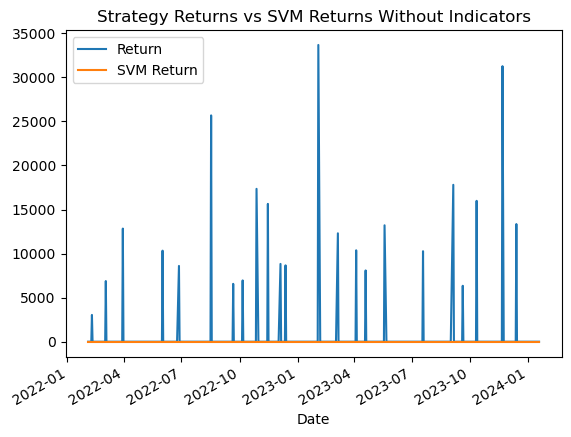

In [18]:
# Plotting the Returns
ax = (predictions_df[["Return", "SVM Return"]]).plot()

# Adding a title
ax.set_title("Strategy Returns vs SVM Returns Without Indicators")

## Build a Model

In [19]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features+1)//2

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1+1)//2

# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

# Display the Sequential model summary
nn.summary()

# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled,y_train, 
                    epochs=100,
                    batch_size=25,
                    shuffle=False)

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 50        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 72 (288.00 Byte)
Trainable params: 72 (288.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/100


22/22 [==============================] - 1s 1ms/step - loss: 0.7195 - accuracy: 0.5009
Epoch 2/100
22/22 [==============================] - 0s 977us/step - loss: 0.6647 - accuracy: 0.5882
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6154 

In [20]:
# Extract predictions from neural network
predictions = nn.predict(X)
print(predictions)

32/32 [==============================] - 0s 664us/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [21]:
# Add Dates and set index
nn_predictions = round(pd.DataFrame(predictions,index=X.index, columns=['NN Signal']),0)
nn_predictions

,NN Signal
Date,
2020-01-03,1.0
2020-01-06,1.0
2020-01-07,1.0
2020-01-08,1.0
2020-01-09,1.0
...,...
2024-01-12,1.0
2024-01-16,1.0
2024-01-17,1.0


In [22]:
# Merge predicted signals and predictions_df to compare results
compare_df = pd.merge(predictions_df, nn_predictions, on='Date')
compare_df["NN Return"] = compare_df["NN Signal"] * -compare_df['Return']

compare_df[compare_df['Signal'] != 0]

,Signal,SVM Signal,Return,SVM Return,NN Signal,NN Return
Date,,,,,,
2022-02-09,-1.0,0.0,3035.838470,-0.0,1.0,-3035.838470
2022-02-24,1.0,0.0,-0.000000,0.0,1.0,0.000000
2022-03-03,-1.0,0.0,6882.371490,-0.0,1.0,-6882.371490
2022-03-14,1.0,0.0,-0.000000,0.0,1.0,0.000000
2022-03-30,-1.0,0.0,12836.847610,-0.0,1.0,-12836.847610
2022-04-21,-1.0,0.0,0.000000,-0.0,1.0,-0.000000
2022-05-04,-1.0,0.0,0.000000,-0.0,1.0,-0.000000
2022-05-20,1.0,0.0,-0.000000,0.0,1.0,0.000000
2022-06-01,-1.0,0.0,10330.202637,-0.0,1.0,-10330.202637


Text(0.5, 1.0, 'Strategy Returns vs NN Returns Without Indicators')

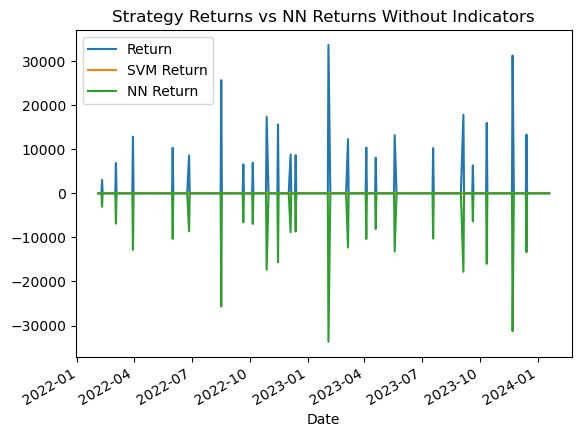

In [23]:
# Plotting the Returns
ax2 = (compare_df[["Return", "SVM Return", "NN Return"]]).plot()

# Adding a title
ax2.set_title("Strategy Returns vs NN Returns Without Indicators")
# Plot returns

In [24]:
# Make second neural network

# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_2 =  (number_input_features+1)//2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1_2

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_2 =  (hidden_nodes_layer1+1)//2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2_2

# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_2 =  (hidden_nodes_layer2+1)//2

# Review the number hidden nodes in the third layer
hidden_nodes_layer3_2

# Create the Sequential model instance
nn_2 = Sequential()

# Add the first hidden layer
nn_2.add(Dense(units=hidden_nodes_layer1_2, input_dim=number_input_features, activation="sigmoid"))

# Add the second hidden layer
nn_2.add(Dense(units=hidden_nodes_layer2_2, activation="sigmoid"))

# Add the third hidden layer
nn_2.add(Dense(units=hidden_nodes_layer3_2, activation="sigmoid"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn_2.add(Dense(units=number_output_neurons, activation="sigmoid"))

# Display the Sequential model summary
nn_2.summary()

# Compile the Sequential model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model using 100 epochs and the training data
fit_model_2 = nn_2.fit(X_train_scaled, y_train, epochs=100, shuffle=False)

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 50        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 1.3012 - accuracy: 0.0550
Epoch 2/100
17/17 [==============================] 

In [25]:
# Extract predictions from neural network
predictions_2 = nn_2.predict(X)
print(predictions_2)

32/32 [==============================] - 0s 1ms/step
[[0.12698084]
 [0.12698084]
 [0.12698084]
 ...
 [0.12698084]
 [0.12698084]
 [0.12698084]]


In [26]:
# Add Dates and set index
nn_predictions_2 = round(pd.DataFrame(predictions_2,index=X.index, columns=['NN2 Signal']),0)
nn_predictions_2

,NN2 Signal
Date,
2020-01-03,0.0
2020-01-06,0.0
2020-01-07,0.0
2020-01-08,0.0
2020-01-09,0.0
...,...
2024-01-12,0.0
2024-01-16,0.0
2024-01-17,0.0


In [27]:
# Merge predicted signals and predictions_df to compare results
compare_df = pd.merge(compare_df, nn_predictions_2, on='Date')
compare_df["NN2 Return"] = compare_df["NN2 Signal"] * -compare_df['Return']

compare_df[compare_df['Signal'] != 0]

,Signal,SVM Signal,Return,SVM Return,NN Signal,NN Return,NN2 Signal,NN2 Return
Date,,,,,,,,
2022-02-09,-1.0,0.0,3035.838470,-0.0,1.0,-3035.838470,0.0,-0.0
2022-02-24,1.0,0.0,-0.000000,0.0,1.0,0.000000,0.0,0.0
2022-03-03,-1.0,0.0,6882.371490,-0.0,1.0,-6882.371490,0.0,-0.0
2022-03-14,1.0,0.0,-0.000000,0.0,1.0,0.000000,0.0,0.0
2022-03-30,-1.0,0.0,12836.847610,-0.0,1.0,-12836.847610,0.0,-0.0
2022-04-21,-1.0,0.0,0.000000,-0.0,1.0,-0.000000,0.0,-0.0
2022-05-04,-1.0,0.0,0.000000,-0.0,1.0,-0.000000,0.0,-0.0
2022-05-20,1.0,0.0,-0.000000,0.0,1.0,0.000000,0.0,0.0
2022-06-01,-1.0,0.0,10330.202637,-0.0,1.0,-10330.202637,0.0,-0.0


Text(0.5, 1.0, 'Strategy Returns vs NN2 Returns Without Indicators')

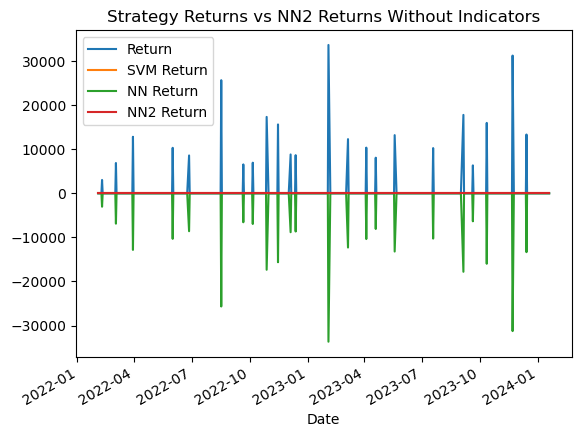

In [29]:
# Plotting the Returns
ax3 = (compare_df[["Return", "SVM Return", "NN Return", "NN2 Return"]]).plot()

# Adding a title
ax3.set_title("Strategy Returns vs NN2 Returns Without Indicators")